In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import timm

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = 512
num_workers = 8

model_name = 'vit_base_patch16_224'
pretrained = True
num_classes = 10

device_gpu = 'cuda:2'

label_smoothing = 0.1
learning_rate = 0.001
epochs = 30

model_path = 'best_model.pth'  # 모델 저장 경로

In [3]:
# 데이터 증강을 위한 전처리
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),  # 무작위 크기 및 비율로 자르기
    transforms.RandomHorizontalFlip(),  # 50% 확률로 수평 뒤집기
    transforms.RandomRotation(15),      # -15도에서 15도 사이로 무작위 회전
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 색상 변경
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
len(trainloader), len(testloader)

(98, 20)

In [5]:
model = timm.create_model(model_name=model_name, 
                          pretrained=pretrained, 
                          num_classes=num_classes)

device = torch.device(device_gpu if torch.cuda.is_available() else "cpu")
model.to(device)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [6]:
criterion1 = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
criterion2 = nn.CrossEntropyLoss(label_smoothing=0.0)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer, max_lr=learning_rate*2, total_steps=epochs*len(trainloader))

In [7]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

Epoch 1: 100%|██████████| 98/98 [05:29<00:00,  3.36s/it]


Epoch 1, Loss: 2.4600076918699303, Val Loss: 1.9546925842761993, Duration: 353.98 sec - model saved!


Epoch 2: 100%|██████████| 98/98 [05:31<00:00,  3.38s/it]


Epoch 2, Loss: 2.039853515673657, Val Loss: 1.8213160812854767, Duration: 355.29 sec - model saved!


Epoch 3: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 3, Loss: 1.940426879999589, Val Loss: 1.6390163481235505, Duration: 358.08 sec - model saved!


Epoch 4: 100%|██████████| 98/98 [05:33<00:00,  3.41s/it]


Epoch 4, Loss: 1.8590275049209595, Val Loss: 1.4971964180469512, Duration: 358.15 sec - model saved!


Epoch 5: 100%|██████████| 98/98 [05:36<00:00,  3.44s/it]


Epoch 5, Loss: 1.779363984964332, Val Loss: 1.3960848987102508, Duration: 361.11 sec - model saved!


Epoch 6: 100%|██████████| 98/98 [05:33<00:00,  3.41s/it]


Epoch 6, Loss: 1.7025477509109341, Val Loss: 1.337375384569168, Duration: 358.00 sec - model saved!


Epoch 7: 100%|██████████| 98/98 [05:34<00:00,  3.42s/it]


Epoch 7, Loss: 1.66089429417435, Val Loss: 1.2956031203269958, Duration: 359.18 sec - model saved!


Epoch 8: 100%|██████████| 98/98 [05:34<00:00,  3.41s/it]


Epoch 8, Loss: 1.6239708443077243, Val Loss: 1.1964524149894715, Duration: 358.55 sec - model saved!


Epoch 9: 100%|██████████| 98/98 [05:34<00:00,  3.41s/it]


Epoch 9, Loss: 1.5903545058503443, Val Loss: 1.1600088119506835, Duration: 358.72 sec - model saved!


Epoch 10: 100%|██████████| 98/98 [05:34<00:00,  3.41s/it]


Epoch 10, Loss: 1.5480668009543905, Val Loss: 1.1361199915409088, Duration: 358.98 sec - model saved!


Epoch 11: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 11, Loss: 1.52007210984522, Val Loss: 1.1163788199424745, Duration: 356.89 sec - model saved!


Epoch 12: 100%|██████████| 98/98 [05:35<00:00,  3.42s/it]


Epoch 12, Loss: 1.4959482793905297, Val Loss: 1.032638505101204, Duration: 359.93 sec - model saved!


Epoch 13: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 13, Loss: 1.4757194969118859, Val Loss: 0.9912605196237564, Duration: 357.03 sec - model saved!


Epoch 14: 100%|██████████| 98/98 [05:35<00:00,  3.42s/it]


Epoch 14, Loss: 1.4474484214977341, Val Loss: 1.003460755944252, Duration: 359.12 sec


Epoch 15: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 15, Loss: 1.4196847713723475, Val Loss: 1.030714675784111, Duration: 355.93 sec


Epoch 16: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 16, Loss: 1.399209194037379, Val Loss: 0.892454794049263, Duration: 356.99 sec - model saved!


Epoch 17: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 17, Loss: 1.3788884294276336, Val Loss: 0.8730225175619125, Duration: 356.97 sec - model saved!


Epoch 18: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 18, Loss: 1.3616938846451896, Val Loss: 0.9566131263971329, Duration: 356.97 sec


Epoch 19: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 19, Loss: 1.3413548639842443, Val Loss: 0.8778787404298782, Duration: 356.21 sec


Epoch 20: 100%|██████████| 98/98 [05:34<00:00,  3.41s/it]


Epoch 20, Loss: 1.3222508187196693, Val Loss: 0.8929333001375198, Duration: 358.20 sec


Epoch 21: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 21, Loss: 1.303648364787199, Val Loss: 0.8083814173936844, Duration: 357.55 sec - model saved!


Epoch 22: 100%|██████████| 98/98 [05:32<00:00,  3.40s/it]


Epoch 22, Loss: 1.2876877967192202, Val Loss: 0.778469467163086, Duration: 357.14 sec - model saved!


Epoch 23: 100%|██████████| 98/98 [05:34<00:00,  3.42s/it]


Epoch 23, Loss: 1.2705025636419958, Val Loss: 0.8157700419425964, Duration: 358.52 sec


Epoch 24: 100%|██████████| 98/98 [05:35<00:00,  3.42s/it]


Epoch 24, Loss: 1.2562669114190705, Val Loss: 0.7990606933832168, Duration: 359.65 sec


Epoch 25: 100%|██████████| 98/98 [05:37<00:00,  3.44s/it]


Epoch 25, Loss: 1.2387264200619288, Val Loss: 0.745245161652565, Duration: 361.78 sec - model saved!


Epoch 26: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 26, Loss: 1.2282556404872818, Val Loss: 0.7365725249052048, Duration: 357.71 sec - model saved!


Epoch 27: 100%|██████████| 98/98 [05:34<00:00,  3.41s/it]


Epoch 27, Loss: 1.2100790714731022, Val Loss: 0.7404593616724015, Duration: 357.92 sec


Epoch 28: 100%|██████████| 98/98 [05:35<00:00,  3.42s/it]


Epoch 28, Loss: 1.2097268846570228, Val Loss: 0.7238127917051316, Duration: 359.91 sec - model saved!


Epoch 29: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 29, Loss: 1.1931596872757892, Val Loss: 0.6761779308319091, Duration: 357.83 sec - model saved!


Epoch 30: 100%|██████████| 98/98 [05:32<00:00,  3.40s/it]


Epoch 30, Loss: 1.1772012090196415, Val Loss: 0.714428398013115, Duration: 356.28 sec


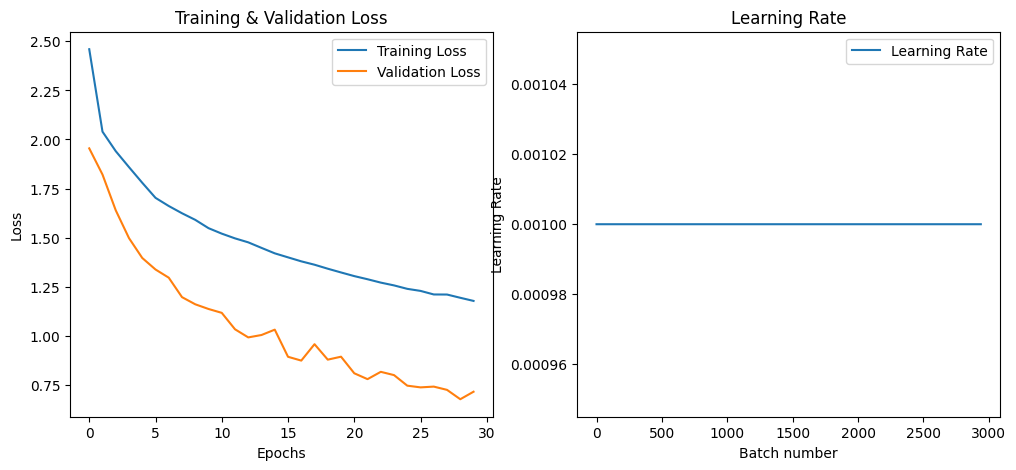

In [8]:
from tqdm import tqdm

training_time = 0
early_stopping = EarlyStopping(patience=5)
losses = []
val_losses = []
lrs = []
best_val_loss = float('inf')

model_save = False

for epoch in range(epochs):
    model.train()
    start_time = time.time()
    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader), total=len(trainloader), desc=f"Epoch {epoch + 1}")
    for i, data in pbar:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion1(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
        lrs.append(optimizer.param_groups[0]["lr"])
    epoch_loss = running_loss / len(trainloader)
    losses.append(epoch_loss)

    # 검증 손실 계산
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion2(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    # 모델 저장
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        model_save = True
        torch.save(model.state_dict(), model_path)

    epoch_duration = time.time() - start_time
    training_time += epoch_duration
    if model_save:
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss}, Val Loss: {val_loss}, Duration: {epoch_duration:.2f} sec - model saved!')
        model_save = False
    else :
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss}, Val Loss: {val_loss}, Duration: {epoch_duration:.2f} sec')

    # Early Stopping 체크
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# 학습 및 검증 손실 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lrs, label='Learning Rate')
plt.title('Learning Rate')
plt.xlabel('Batch number')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()
